# Studying The Value Anomaly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from io import StringIO
from scipy.stats import linregress

def get_factor_dataframe(file):
    
    # function to get a dataframe from Kenneth French factor portfolio data
    
    # file  : path to csv file
    
    factor_df=pd.read_csv(StringIO(open(file).read().split("\n\n")[5]),skiprows=[0,1],index_col=0)
    factor_df.index=pd.to_datetime(factor_df.index.astype(str).str[:4]+"-"+factor_df.index.astype(str).str[4:]+"-1")
    factor_df=factor_df.resample('1m').last()
    return factor_df

# data is from Kenneth R. French Data Library:
# https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

file = 'Data/6_Portfolios_2x3.csv'
factor_df = get_factor_dataframe(file)

# Results

The value anomaly refers to the historical outperformance of stocks deemed cheap by various financial multiples. A commonly used metric for value is price to book which we examine here. Price to book was used to create the initial "High Minus Low" Fama French Factor. We subtract the returns of low book to price firms from the returns of high book to price firms in order to get the difference in returns and plot the cumulative sum of the returns in order to see the comparative performance. Data is from the open Kenneth French Data Library.

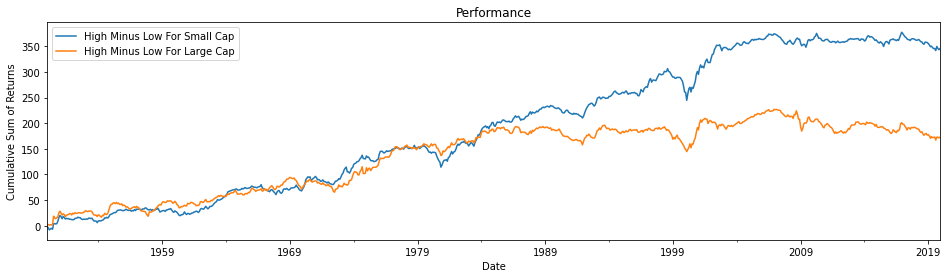

In [2]:
start_date = '1950-01-01'
end_date   = '2019-12-31'

small_hml=(factor_df['SMALL HiBM']-factor_df['SMALL LoBM'])[start_date:end_date].cumsum()
big_hml=(factor_df['BIG HiBM']-factor_df['BIG LoBM'])[start_date:end_date].cumsum()

small_hml.plot(figsize=(16,4),label="High Minus Low For Small Cap")
big_hml.plot(figsize=(16,4),label="High Minus Low For Large Cap")
plt.title("Performance")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Sum of Returns")
plt.show()

We see that the value anomaly is the same for small and large firms up until about 1985 when the two paths diverge. We show a regression of the performance of the value anomaly in large firms after 1985 below:

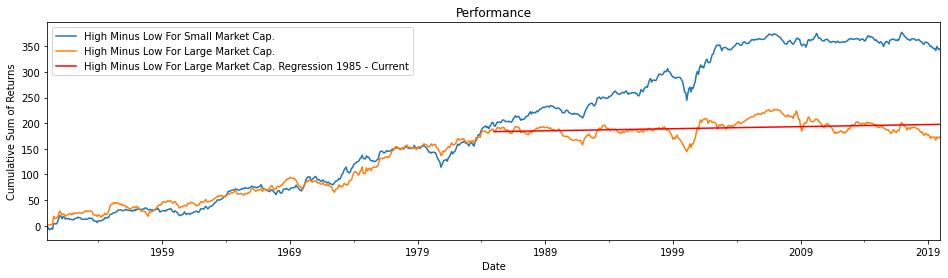

In [3]:
regress_start_date = '1985-01-01'
Y=big_hml[regress_start_date:]
coef = linregress(np.arange(len(Y)),Y.values)
line=pd.Series(coef.slope*np.arange(len(Y))+coef.intercept,Y.index)

small_hml.plot(figsize=(16,4),label="High Minus Low For Small Market Cap.")
big_hml.plot(figsize=(16,4),label="High Minus Low For Large Market Cap.")
line.plot(figsize=(16,4),label="High Minus Low For Large Market Cap. Regression 1985 - Current",color='Red')
plt.title("Performance")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Sum of Returns")
plt.show()

To get a better idea of performance, we look at more splits on size to see which size quintiles below are responsible for the largest portion of the outperformance of cheap firms, especially since 1985:

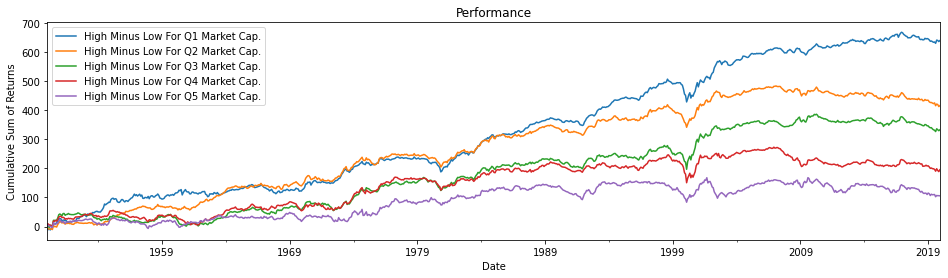

In [4]:
large_file = 'Data/25_Portfolios_5x5.csv'
large_factor_df = get_factor_dataframe(large_file)

q1_size_hml=(large_factor_df['SMALL HiBM']-large_factor_df['SMALL LoBM'])[start_date:end_date].cumsum()
q2_size_hml=(large_factor_df['ME2 BM5']-large_factor_df['ME2 BM1'])[start_date:end_date].cumsum()
q3_size_hml=(large_factor_df['ME3 BM5']-large_factor_df['ME3 BM1'])[start_date:end_date].cumsum()
q4_size_hml=(large_factor_df['ME4 BM5']-large_factor_df['ME4 BM1'])[start_date:end_date].cumsum()
q5_size_hml=(large_factor_df['BIG HiBM']-large_factor_df['BIG LoBM'])[start_date:end_date].cumsum()

q1_size_hml.plot(figsize=(16,4),label="High Minus Low For Q1 Market Cap.")
q2_size_hml.plot(figsize=(16,4),label="High Minus Low For Q2 Market Cap.")
q3_size_hml.plot(figsize=(16,4),label="High Minus Low For Q3 Market Cap.")
q4_size_hml.plot(figsize=(16,4),label="High Minus Low For Q4 Market Cap.")
q5_size_hml.plot(figsize=(16,4),label="High Minus Low For Q5 Market Cap.")
plt.title("Performance")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Sum of Returns")
plt.show()

We see that by far the effect is more pronounced in small firms so we examine the overall effect in all but the bottom size quintile since 1985. We see that it appears to be present to an extent for some time after 1985 but it seems to be not as significant as before.

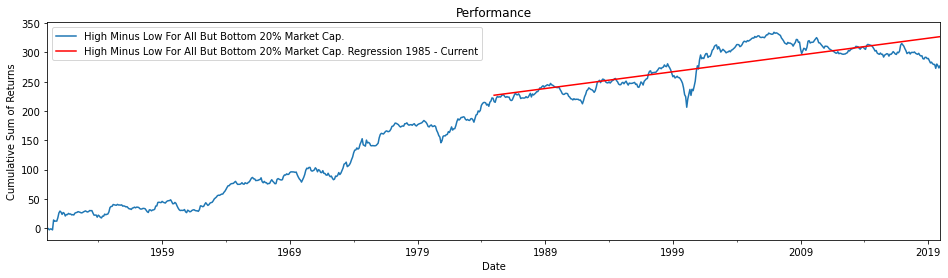

In [5]:
combined_less_smallest = pd.concat([q2_size_hml,q3_size_hml,q4_size_hml,big_hml
                                   ],axis=1).diff().mean(axis=1).cumsum()

Y=combined_less_smallest[regress_start_date:]
coef = linregress(np.arange(len(Y)),Y.values)
line=pd.Series(coef.slope*np.arange(len(Y))+coef.intercept,Y.index)
combined_less_smallest.plot(figsize=(16,4),label="High Minus Low For All But Bottom 20% Market Cap.")
line.plot(figsize=(16,4),
          label="High Minus Low For All But Bottom 20% Market Cap. Regression 1985 - Current",color='red')
plt.title("Performance")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Sum of Returns")
plt.show()

Running the same regression since the year 2000 shows that for companies outside the bottom quintile the value anomally seems to have disappeared.

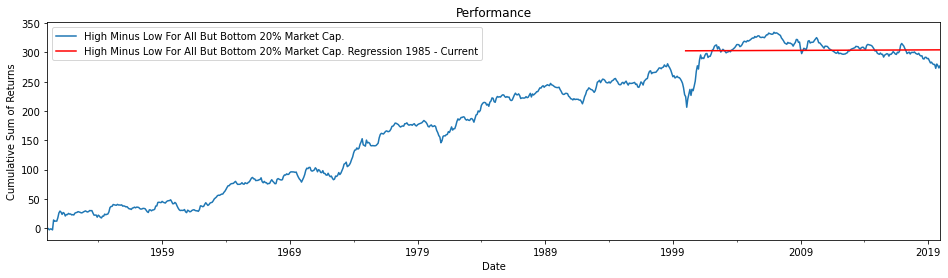

In [6]:
regress_start_date_2 = '2000-01-01'
Y=combined_less_smallest[regress_start_date_2:]
coef = linregress(np.arange(len(Y)),Y.values)
line=pd.Series(coef.slope*np.arange(len(Y))+coef.intercept,Y.index)
combined_less_smallest.plot(figsize=(16,4),label="High Minus Low For All But Bottom 20% Market Cap.")
line.plot(figsize=(16,4),
          label="High Minus Low For All But Bottom 20% Market Cap. Regression 1985 - Current",color='red')
plt.title("Performance")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Sum of Returns")
plt.show()

# Short discussion

We see that in recent decades the value anomaly has seemingly disappeared and is perhaps only present among very small firms. This could be the result of poor liquidity among firms of such small market caps and may not be actionable. Investing based on fundementals may need to go deeper than simply buying companies that are cheap. There may be other actionable fundemental factors that can produce high comparative returns. 